# Task 2

---

## Predictive modeling of customer bookings

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [147]:
import pandas as pd
import numpy as np

In [114]:
df = pd.read_csv("customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [116]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [117]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [118]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5], dtype=int64)

In [119]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.

From this point, you should continue exploring the dataset with some visualisations and other metrics that you think may be useful. Then, you should prepare your dataset for predictive modelling. Finally, you should train your machine learning model, evaluate it with performance metrics and output visualisations for the contributing variables. All of this analysis should be summarised in your single slide.

In [120]:
df.shape

(50000, 14)

In [121]:
# checking for null values
df.isnull().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

In [122]:
df.duplicated().sum()

719

In [123]:
df = df.drop_duplicates()

In [124]:
df.duplicated().sum()

0

In [125]:
df.shape

(49281, 14)

### Plotting

In [126]:
# import seaborn as sns
# sns.pairplot(df, hue="booking_complete", palette="Set2");

df_cor = df.corr()
df_cor

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
num_passengers,1.000000,0.214999,-0.115380,0.016393,0.014801,0.120724,0.029509,0.022252,-0.062028,0.024092
purchase_lead,0.214999,1.000000,-0.076747,0.035112,0.036214,-0.021599,-0.004459,-0.022533,0.067934,-0.022132
length_of_stay,-0.115380,-0.076747,1.000000,-0.025525,0.000756,0.177536,0.031215,0.098846,0.140408,-0.042080
flight_hour,0.016393,0.035112,-0.025525,1.000000,0.024212,-0.010911,0.012251,0.011953,-0.003236,0.006705
flight_day,0.014801,0.036214,0.000756,0.024212,1.000000,-0.002517,0.005723,0.007799,0.019187,-0.007061
wants_extra_baggage,0.120724,-0.021599,0.177536,-0.010911,-0.002517,1.000000,0.208392,0.216835,0.057637,0.068452
wants_preferred_seat,0.029509,-0.004459,0.031215,0.012251,0.005723,0.208392,1.000000,0.315162,0.100652,0.050189
wants_in_flight_meals,0.022252,-0.022533,0.098846,0.011953,0.007799,0.216835,0.315162,1.000000,0.156233,0.026399
flight_duration,-0.062028,0.067934,0.140408,-0.003236,0.019187,0.057637,0.100652,0.156233,1.000000,-0.106529
booking_complete,0.024092,-0.022132,-0.042080,0.006705,-0.007061,0.068452,0.050189,0.026399,-0.106529,1.000000


In [127]:
df_correlation = df.drop('booking_complete',axis=1)

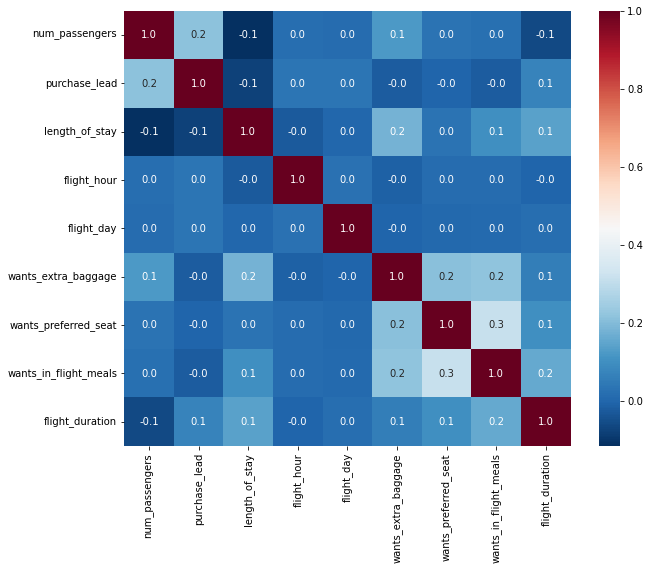

In [128]:
import matplotlib.pyplot as plt

f,ax = plt.subplots(figsize=(10, 8))
sns.heatmap(df_correlation.corr(), cmap="RdBu_r", fmt= ".1f" ,ax=ax, annot=True);

### Splitting data

In [129]:
df['sales_channel'].unique()

array(['Internet', 'Mobile'], dtype=object)

In [130]:
df.trip_type.unique()

array(['RoundTrip', 'CircleTrip', 'OneWay'], dtype=object)

In [131]:
maps = {
    'Mobile': 0,
    'Internet':1
}
df['sales_channel'] = df['sales_channel'].map(maps)

map_2 = {
    'RoundTrip': 0,
    'CircleTrip': 1,
    'OneWay': 2
    
}
df['trip_type'] = df['trip_type'].map(map_2)

In [132]:
df.sales_channel.unique()

array([1, 0], dtype=int64)

In [133]:
df.trip_type.unique()

array([0, 1, 2], dtype=int64)

In [176]:
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

In [179]:
df_train =  df.drop(columns = ['booking_complete','sales_channel','booking_origin','route'],axis=1)
# df = df.drop(columns=['column_1', 'column_2', 'column_3'], axis=1)

In [180]:

X_train, X_test,y_train, y_test = train_test_split(
    df_train,
    df['booking_complete'],test_size = 0.25, random_state=42)

In [170]:
# X_train

In [181]:
print(f"Shape of training set: {X_train.shape}")
print("Shape of test set:", X_test.shape)

Shape of training set: (36960, 10)
Shape of test set: (12321, 10)


### Building Models using all features

In [182]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)

### Random Forest

In [188]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

In [189]:
rfc = RandomForestClassifier(n_estimators=300)
rfc.fit(X_train, y_train)
predictions4 = rfc.predict(X_test)

In [190]:
print("Confusion Matrix: \n", confusion_matrix(y_test, predictions4))

Confusion Matrix: 
 [[10338   154]
 [ 1759    70]]


In [160]:

print("Confusion Matrix: \n", confusion_matrix(y_test, predictions4))
print("\n")
print(classification_report(y_test, predictions4))

Confusion Matrix: 
 [[10355   137]
 [ 1766    63]]


              precision    recall  f1-score   support

           0       0.85      0.99      0.92     10492
           1       0.32      0.03      0.06      1829

    accuracy                           0.85     12321
   macro avg       0.58      0.51      0.49     12321
weighted avg       0.77      0.85      0.79     12321



In [191]:
rfm_acc = accuracy_score(y_test, predictions4)
print("Accuracy of RFM model is: ", rfm_acc)

Accuracy of RFM model is:  0.8447366285204123


In [166]:
importances = rfc.feature_importances_
importances

array([0.05771782, 0.00225022, 0.29844183, 0.16283915, 0.19507975,
       0.11494442, 0.01355646, 0.01507818, 0.02348993, 0.11660225])

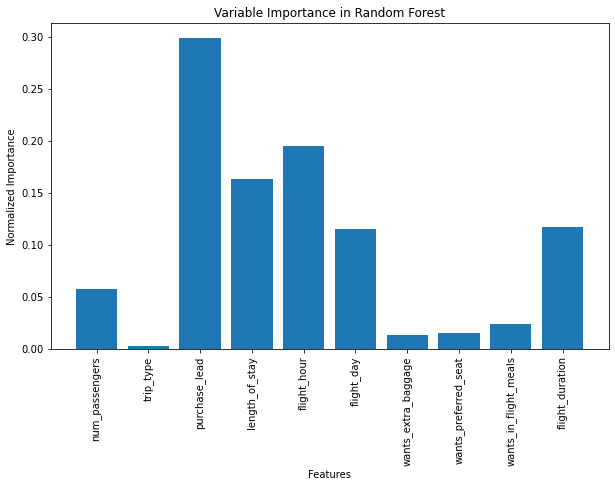

In [199]:
importances_normalized = importances / np.sum(importances)
plt.figure(figsize=(10, 6))
plt.bar(range(df_train.shape[1]), importances_normalized, tick_label=df_train.columns)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Normalized Importance')
plt.title('Variable Importance in Random Forest')
plt.show()

### Logistic Regression

In [183]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, roc_auc_score

In [184]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
prediction_1 = logreg.predict(X_test)

In [140]:
print("Confusion Matrix: \n", confusion_matrix(y_test, prediction_1))

Confusion Matrix: 
 [[10492     0]
 [ 1829     0]]


In [185]:
print("Classification Report: \n", classification_report(y_test, prediction_1))


Classification Report: 
               precision    recall  f1-score   support

           0       0.85      1.00      0.92     10492
           1       0.00      0.00      0.00      1829

    accuracy                           0.85     12321
   macro avg       0.43      0.50      0.46     12321
weighted avg       0.73      0.85      0.78     12321



C:\Users\USER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [186]:
logreg_acc = accuracy_score(y_test, prediction_1)
print("Accuracy of the Logistic Regression Model is: ", logreg_acc*100)

Accuracy of the Logistic Regression Model is:  85.15542569596623


### KNN

In [187]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)
predictions_2 = knn.predict(X_test)
    


In [152]:
confusion_matrix(y_test, knn_model_acc = accuracy_score(y_test, predictions2)
print("Accuracy of K Neighbors Classifier Model is: ", knn_model_acc))

array([[10355,   137],
       [ 1782,    47]], dtype=int64)

In [153]:
classification_report(y_test, predictions_2)

'              precision    recall  f1-score   support\n\n           0       0.85      0.99      0.92     10492\n           1       0.26      0.03      0.05      1829\n\n    accuracy                           0.84     12321\n   macro avg       0.55      0.51      0.48     12321\nweighted avg       0.76      0.84      0.79     12321\n'

In [156]:
knn_model_acc = accuracy_score(y_test, predictions_2)
print("Accuracy of K Neighbors Classifier Model is: ", knn_model_acc*100)

Accuracy of K Neighbors Classifier Model is:  84.42496550604659
